In [2]:
# Création de tenseurs

In [3]:
import torch

# Création d'un tenseur monodimensionnel (vecteur) a, de forme [1, 3]
a = torch.tensor([0, 1, 2])

# Création d'un tenseur bidimensionnel (matrice) b, de forme [2, 3]
b = torch.tensor([[0, 1, 2], [3, 4, 5]])

# Création d'un tenseur monodimensionnel (vecteur) c, de forme [1, 3] et dont toutes les valeurs sont des virgules flottantes sur 32 bits (ou simple precision)
c = torch.tensor([0, 1, 2], dtype=torch.float32)

print(f'Tenseur a : {a}, de type : {a.dtype}')
print(f'Tenseur b : {b}, de type : {b.dtype}')
print(f'Tenseur c : {c}, de type : {c.dtype}')

Tenseur a : tensor([0, 1, 2]), de type : torch.int64
Tenseur b : tensor([[0, 1, 2],
        [3, 4, 5]]), de type : torch.int64
Tenseur c : tensor([0., 1., 2.]), de type : torch.float32


In [4]:
# Fonctions de construction

In [5]:
# Création d'un tenseur de dimension [2, 3] (matrice), avec pour valeurs de chaque emplacement : 0
zero = torch.zeros(2, 3)

# Création d'un tenseur de mêmes dimensions, avec pour valeurs de chaque emplacement : 1
ones = torch.ones(2, 3)

# Création d'un tenseur de mêmes dimensions, avec ses valeurs non initialisées 
# (attention, les valeurs sont soit extrêmement négatives, ie : -5.6649e+22, ou très proches de 0 sans être égal à 0, ie : 2.1174e-42).
empty = torch.empty(2, 3)

# Création d'un tenseur identité (c'est-à-dire un tenseur où seules les valeurs sur la diagonale sont égaux à 1)
id = torch.eye(2, 3)

# Il est possible de créer un tenseur avec pour dimensions les mêmes qu'un autre :
empty_dim_copy = torch.empty_like(empty)

print(f'Tenseur zero : {zero}')
print(f'Tenseur ones : {ones}')
print(f'Tenseur empty : {empty}')
print(f'Tenseur id : {id}')
print(f'Tenseur empty_dim_copy : {empty_dim_copy}')

Tenseur zero : tensor([[0., 0., 0.],
        [0., 0., 0.]])
Tenseur ones : tensor([[1., 1., 1.],
        [1., 1., 1.]])
Tenseur empty : tensor([[0., 0., 0.],
        [0., 0., 0.]])
Tenseur id : tensor([[1., 0., 0.],
        [0., 1., 0.]])
Tenseur empty_dim_copy : tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
# Fixer la graine de génération pour la reproductibilité
torch.manual_seed(42)

# Création d'un tenseur via une suite arithmétique de raison p (min, max [exclu], raison)
# (attention, la borne supérieure est exclue)
tensor = torch.arange(0, 10, 2)

print(tensor)

# Création d'un tenseur avec n termes, entre le min et max (inclus cette fois). 
# La formule du pas est : pas = (max-min)/(steps-1), qui dans notre cas donne : pas = 2.5
tensor_inclusif = torch.linspace(0, 10, steps=5)

print(tensor_inclusif)

# Création d'un tenseur avec ses valeurs aléatoires suivant une 
# distribution uniforme (entre 0 et 1) :
tensor_rand = torch.rand(2, 3)

print(tensor_rand)

# Création d'un tenseur avec ses valeurs aléatoires suivant une 
# distribution normale centrée réduite (µ = 0, σ = 1, pas de min/max, 
# il s'agit d'une détermination probabiliste):
tensor_randn = torch.randn(2, 3)

print(tensor_randn)

# Création d'un tenseur avec ses valeurs aléatoires suivant une 
# distribution normale de moyenne µ et d'écart-type σ :
tensor_norm = torch.normal(mean=2, std=3, size=(2, 3))

print(tensor_norm)


tensor([0, 2, 4, 6, 8])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])
tensor([[ 3.1791,  3.2981, -2.0881],
        [ 6.0693,  4.0064, -0.1231]])


In [7]:
# Reconnaître la forme et le type d'un tenseur

In [8]:
# Pour trouver la forme d'un tenseur, on utilise la méthode .shape :
print(tensor.shape)

# Pour trouver le type de variables d'un tenseur, on utilise la méthode .dtype :
print(tensor.dtype)

# Pour convertir le type de variable, on utilise la méthode .to :
tensor = tensor.to(torch.float32)
print(tensor.dtype)

torch.Size([5])
torch.int64
torch.float32


In [9]:
# Opération sur les tenseurs

# Addition
print(a + b)

# Multiplication élément par élément :
print(a * b)

# Produit matriciel :
mat1 = torch.rand(2, 3)
mat2 = torch.rand(3, 4)
print(torch.mm(mat1, mat2))

tensor([[0, 2, 4],
        [3, 5, 7]])
tensor([[ 0,  1,  4],
        [ 0,  4, 10]])
tensor([[1.2968, 1.1370, 1.2800, 0.9192],
        [1.1895, 0.8779, 1.2013, 0.9961]])


In [10]:
# Tenseurs sur GPU :

if torch.cuda.is_available():
  device = torch.device("cuda")
  tenseur_gpu = torch.zeros(2, 3, device=device)
else:
  print("Pas de GPU disponible.")

# Il est possible de modifier un tenseur pour le passer sur GPU avec la méthode .to()
# Il est aussi possible de forcer la création de tous les tenseurs sur le GPU, 
# avec la méthode torch.set_default_device() :
# x_gpu = tensor.to(device)


Pas de GPU disponible.


In [11]:
# Manipulation avancée des tenseurs

In [12]:
# Pour changer la forme d'un tenseur, deux méthodes sont possibles :
# .view() : retourne un nouveau tenseur partageant la même mémoire que l'original. 
# Le tenseur doit avoir ses valeurs stockées en mémoire de manière consécutive, sans intervalles.
# La transposition (.T) rend le tenseur non-contigu.
x = torch.randn(1, 6)
x_view = x.view(2, 3)

# .reshape() : retourne un nouveau tenseur dans un nouvel espace mémoire.
# Cette méthode fonctionne dans tous les cas de figure.
x_reshaped = x.reshape(2, 3)

# Pour changer l'ordre des dimensions, il est possible d'utiliser la méthode :
# .permute() : Prend comme argument la dimension à permuter
x = torch.rand(2, 4, 3) # -> (batch, hauteur, largeur) 
x_permuted = x.permute(2, 1, 0) # -> (largeur, hauteur, batch)

# Ajouter ou supprimer des dimensions :
# .squeeze() : supprime toutes les dimensions de taille 1
x_sq = x.squeeze()

# .unqueeze(n) : ajoute une dimension de taille 1 à la dimension n
x_unsq = x.unsqueeze(0)

# Pour concaténer ou empiler des tenseurs :
# torch.cat() : concatène le long d'une dimension existante.
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
cat = torch.cat((a, b), dim=0)

# torch.stack() : empile les tenseurs en ajoutant une nouvelle dimension
stack = torch.stack((a, b), dim=0)

In [13]:
# Gradients automatiques (Autograd)

In [14]:
# Pour qu'un tenseur soit automatiquement évalué par le moteur de différentiation de PyTorch :
# Ajouter le paramètre requires_grad=True lors de l'initialisation d'un tenseur.
# Toutes les opérations effectuées sur ce tenseur sont enregistrées automatiquement dans 
# un graphe computationnel dynamique.
x = torch.tensor([2.0, 3.0], requires_grad=True)

y = x ** 2 + 3 * x

In [15]:
# Graphe computationnel

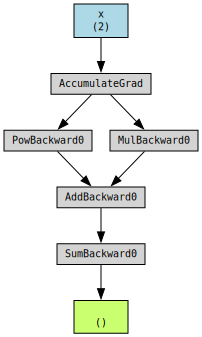

In [16]:
from torchviz import make_dot

z =  y.sum()
make_dot(z, params={'x': x})

# Note sur le graphique généré :
# Le bloc jaune correspond à z,
# Les blocs *Backward0 correspondent aux opérations
# Le bloc AccumulateGrad correspond à l'endroit où
# le gradient est stocké dans la variable d'entrée (ici x.grad)
# Le bloc bleu correspond à l'entrée x

In [17]:
# Calcul des gradients et rétropropagation

In [ ]:
# Autograd utilise ce graphe pour calculer automatiquement les dérivées 
# par rapport à x, en utilisant la méthode backward() (rétropropagation) :
z = y.sum()
z.backward()
print(x.grad)

# Le but de la rétropropagation est de minimiser une fonction de perte (loss)
# en ajustant les paramètres du modèle. Le gradient d'une fonction f(x) est de
# est la pente d'un espace en un point. Quand il s'agit d'un espace monodimentionnel,
# (x : f(x) = x²) le gradient est simplement la dérivée de la fonction :
# lim h->0 [f(x+h)-f(x)]/h. Sinon, le gradient est calculé à partir de chaque 
# dimension : ∇f(x,y) = ∂f/∂x ✕ ∂f/∂y = ∂²f/∂x∂y

tensor([7., 9.])


In [19]:
# Manipuler des tenseurs sans gradients

In [20]:
# Sur PyTorch, il est utile de séparer certaines opérations du calcul des gradients.
# Voici 3 outils :
# .detach() : Crée un nouveau tenseur aves les mêmes valeurs que l'original, sans
# suivre le calcul des gradients, utile pour visualiser sans affecter la rétropropagation.
y = x * 2
z = y.detach()

# .clone() : Crée une copie indépendante d'un tenseur, la copie peut continuer à calculer
# des gradients si requires_grad=True. S'avère être utile pour sauvegarder un état.
y_clone = y.clone()

# torch.no_grad() ou @torch.no_grad() : Contexte qui empêche toutes les opérations à 
# l'intérieur de lui de calculer des gradients. Utile pour l'évaluation du modèle, 
# permet d'économiser de la mémoire et de la puissance de calculs.
with torch.no_grad():
  y_no_grad = x * 2
# Ou :
@torch.no_grad()
def no_grad(x):
  return x * 2

# Pour utiliser @torch.no_grad(), la définition après doit impérativement être une classe
# ou une fonction. 
y_no_grad = no_grad(x)

In [21]:
# Exercice 1

In [22]:
# f'(a) = 2a + 1, en évaluant en 1, f'(1) = 3

x = torch.tensor([1.], requires_grad=True)
y = x ** 2 + x
z = y.sum()
z.backward()

print(x.grad)

tensor([3.])


In [23]:
# La fonction de perte

In [24]:
# Son objectif est de minimiser l'erreur entre les prédictions et la vérité terrain.
# Elle est essentielle pour plein de choses :
# - Elle quantifie l'erreur
# - Permet de guider l'apprentissage
# - Est le point de départ de la rétropropagation
# - Permet aux algorithmes d'optimisation d'ajuster les paramètres du modèle
# - Permet de comparer différents modèles
# - Permet d'avoir une direction pour l'entraînement d'un modèle 

In [ ]:
# Régression et Erreur quadratique moyenne (criterion, Mean squared error)

In [ ]:
# La fonction de perte est alors définie comme suit :
# L(y, ŷ) = 1/n ✕ Σ i = 0 -> n : (y_i - ŷ_i)²
# où L() est la fonction de perte, n le # de données, y la valeur attendue
# et ŷ la prédiction du modèle.

# Pour utiliser la criterion dans PyTorch, il faut utiliser la classe nn.MSELoss().
from torch.nn import MSELoss

y_true = torch.tensor([2.0, 3.0, 4.0])
y_pred = torch.tensor([2.5, 2.7, 4.2])

criterion = MSELoss()

print(criterion(y_pred, y_true))

tensor(0.1267)


In [27]:
# Classification et entropie croisée

In [28]:
# On appelle classification les cas où il faut prédire à quelle classe appartient qqch.
# Dans ces cas, la foncition de perte la plus courante est l'entropie croisée (Cross-Entropy
# Loss).
# L(y, ŷ) = -Σ i = 0 -> n : y_i ✕ log(ŷ_i)
# où L() est la fonction de perte, n le # de classes, y la valeur attendue
# et ŷ la prédiction du modèle.

# Pourquoi l'entropie croisée ?
# - Permet la classification multi-classes
# - Pénalise fortement les erreurs de classification
# - Est différentiable, donc utilisable avec la rétropropagation

# Pour utiliser la fonction Cross-Entropy Loss dans PyTorch :
from torch.nn import CrossEntropyLoss

y_pred = torch.tensor([[2.0, 1.0, 0.1]])
y_true = torch.tensor([0])

CEL = CrossEntropyLoss()

# On utilise ici .item() pour extraire la valeur d'un tenseur 1D 
# (scalaire), généralement un int ou un float.
print(CEL(y_pred, y_true).item())

y_pred = torch.tensor([[0.2, 2.0, 0.1]])

print(CEL(y_pred, y_true).item())

0.4170299470424652
2.0737359523773193


In [29]:
# Optimisation

In [ ]:
# Pour optimiser les paramètres d'un modèle
# On calcule la loss
# On calcule le gradient de la perte par rapport aux paramètres
# On met à jour les paramètres de manière à ce qu'ils diminuent la perte

In [31]:
# Descente de gradient

In [ ]:
# L'algorithme d'optimisation le plus courant est la descente de gradient :
# La formule est la suivante :
# θ_new = θ_old - η ⋅ ∇_θL(θ)
# où θ représente l'ensemble des paramètres du modèle, L() est la fonction de perte
# η est le taux d'apprentissage et ∇_θL(θ) désigne le gradient de L(θ).

# Avec PyTorch
import torch.optim as optim

x = torch.tensor([1., 2., 3., 4.])
y = torch.tensor([2., 4., 6., 8.])
a = torch.tensor([0.], requires_grad=True)

# SGD : Stochastic Gradient Descent (Descente de gradient stochastique)
optimiser = optim.SGD([a], lr=0.1)

criterion = MSELoss()

for i in range(10):
  # Mettre à 0 le gradient
  optimiser.zero_grad()

  # Calcul de la prédiction
  y_pred = a * x

  # Calcul de la perte
  loss = criterion(y_pred, y)

  # Calcul automatique des gradients
  loss.backward()

  # Mise à jour du paramètre a
  optimiser.step()

print(round(a.item(), 4), round(loss.item(), 4))

1.998 0.0001


In [33]:
# Optimiseur Adam

In [ ]:
# Adam est un autre algorithme d'optimisation qui adapte le pas pour chaque 
# paramètre grâce à une moyenne mobile des gradients et une moyenne mobile 
# des carrés des gradients.
# Voici son expression :

# θ_new = θ_old - η ⋅ m̂_t/(√(v̂_t) + ε)

# où g_t = ∇_θL(θ), m_t = β_1⋅m_(t-1) + (1-β_1)g_t, soit la moyenne mobile
# des gradients, v_t = β_2⋅m_(t-1) + (1-β_2)(g_t)², soit la moyenne mobile
# des carrés des gradients, m̂_t = m_t/(1-(β_1)^t), la correction de biais pour
# le premier moment, v̂_t = v_t/(1-(β_2)^t), la correction de biais pour le 
# deuxième moment, ε, une petite constante pour éviter la division par 0

# Différences entre Adam et SGD :
# SGD applique la même règle de mise à jour pour tous les paramètres
# Adam adapte le taux d'apprentissage pour chaque paramètre individuel
# (convergence souvent plus rapide)

# Avec PyTorch
optimiser = optim.Adam([a])

criterion = MSELoss()

for i in range(10):
  optimiser.zero_grad()
  y_pred = a * x
  loss = criterion(y_pred, y)
  loss.backward()
  optimiser.step()

print(round(a.item(), 4), round(loss.item(), 4))

1.9996 0.0


In [35]:
# Exercice 2

1.5377 12.602


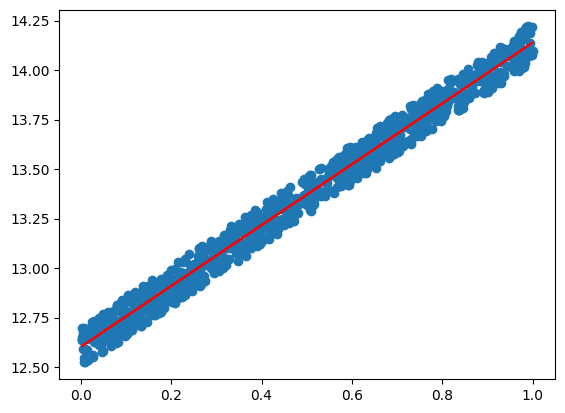

In [ ]:
import matplotlib.pyplot as plt

# Créer des tenseurs dès le départ
x = torch.rand(1000)
y_true = x * 1.54 + 12.5 + torch.rand(1000)*0.2
a, b = (torch.tensor([0.], requires_grad=True) for _ in range(2))
# lr à 0.01 sinon trop long, besoin de trop d'epochs (100k à 0.001)
optimiser = optim.Adam([a, b], lr=1e-2)
# criterion = MSELoss()

for i in range(10000):
  optimiser.zero_grad()
  y_pred = a * x + b
  # criterion classique, rapide et efficace avec torch.mean
  loss = torch.mean((y_true - y_pred) ** 2) # ou criterion(y_true, y_pred)
  loss.backward()
  optimiser.step()
  if loss < 0.1:
    break

print(round(a.item(), 4), round(b.item(), 4))

# Ne pas oublier de repasser sur le CPU
with torch.no_grad():
  plt.scatter(x, y_true)
  plt.plot(x, a*x+b, c='r')
  plt.show()

In [37]:
# Exercice 3

1.5211 12.6109


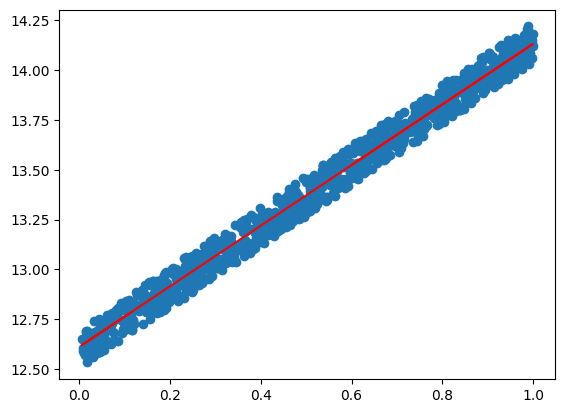

In [ ]:
from torch.nn import L1Loss

x = torch.rand(1000)
y_true = x * 1.54 + 12.5 + torch.rand(1000)*0.2
a, b = (torch.tensor([0.], requires_grad=True) for _ in range(2))
optimiser = optim.Adam([a, b], lr=1e-2) # optimiser = optim.SGD([a, b], lr=1e-2)

for i in range(2500):
  optimiser.zero_grad()
  y_pred = a * x + b
  # criterion classique, rapide et efficace avec torch.mean
  loss = torch.mean(abs(y_true - y_pred)) # ou criterion = L1Loss() -> loss = criterion(y_true, y_pred)
  loss.backward()
  optimiser.step()
  if loss < 0.1:
    break

print(round(a.item(), 4), round(b.item(), 4))

with torch.no_grad():
  plt.scatter(x, y_true)
  plt.plot(x, a*x+b, c='r')
  plt.show()

# Adam converge bien plus vite que SGD, dans ce cas, Adam est meilleur puisque les 
# moyennes mobiles et l'adaptation de chacun des paramètres le bien plus efficace.
# Si le lr est trop grand, un effet de rebond est présent où l'optimisateur n'arrive 
# pas à converger, et s'il est trop petit, l'optimisateur gâche des ressources et met
# beaucoup de temps à converger.

In [39]:
# Exercice Supplémentaire 1

In [40]:
# f'(a) = 9a² - 4a + 1, en évaluant en 2 : f(2) = 29

a = torch.tensor([2.], requires_grad=True)
y = 3 * a ** 3 - 2 * a ** 2 + a
z = y.sum()
z.backward()

print(a.grad)

tensor([29.])


In [41]:
# Exercice Supplémentaire 2

In [42]:
# f'(a, b) = b + 2a * a + a², 7 * 4 = 28

a, b = (torch.tensor([2.], requires_grad=True) for _ in range(2))
y = a * b + a ** 2
z = y.sum()
z.backward()

print(a.grad, b.grad)

tensor([6.]) tensor([2.])


In [43]:
# Exercice Supplémentaire 3

1.9840731620788574 2.9969396591186523 1.1332314014434814


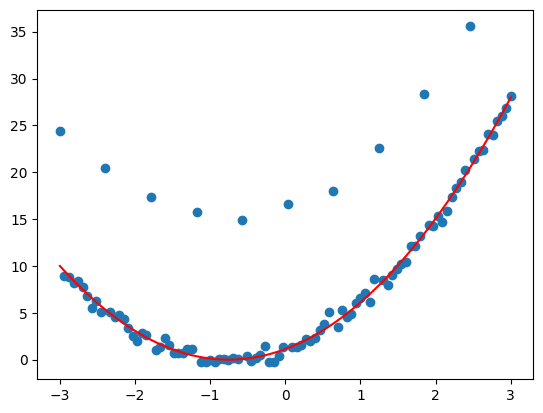

In [ ]:
torch.manual_seed(0)
x = torch.linspace(-3, 3, 100)
y_true = 2 * x ** 2 + 3 * x + 1 + 0.5 * torch.randn(x.size())
y_true[::10] += 15
a, b, c = (torch.tensor([0.], requires_grad=True) for _ in range(3))
optimiser = optim.Adam([a, b, c], lr=1e-2)

# criterion = MSELoss()
criterion = L1Loss()

for i in range(1000):
  optimiser.zero_grad()
  y_pred = a * x ** 2 + b * x + c
  loss = criterion(y_true, y_pred)
  loss.backward()
  optimiser.step()
  if loss < 0.1:
    break

print(a.item(), b.item(), c.item())

with torch.no_grad():
  plt.scatter(x, y_true)
  plt.plot(x, a * x ** 2 + b * x + c, c='r')
  plt.show()

In [45]:
# Exercice supplémentaire 4

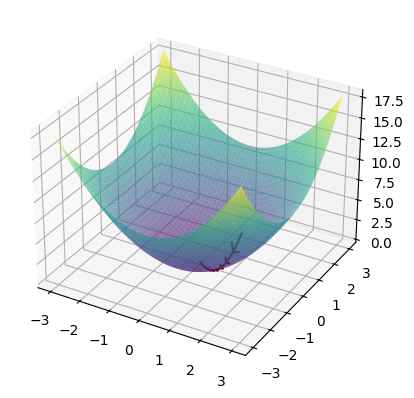

In [46]:
# f'(a, b) = 2a, 2b
import torch
import matplotlib.pyplot as plt

# Surface
g = torch.linspace(-3, 3, 100)
# Obligatoire pour créer un espace en 2D pour Z (crée une liaison entre X et Y)
X, Y = torch.meshgrid(g, g, indexing='ij')
Z = X**2 + Y**2

a, b = 2.5, -2.0
lr = 0.1
traj = []
for _ in range(26):
  traj.append((a, b, a*a + b*b))
  # La Descente de Gradient : θ_new = θ_old - η ⋅ ∇_θL(θ)
  a -= lr * 2 * a
  b -= lr * 2 * b

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, antialiased=True)

# Couplage de chaque point de la trajectoire avec le point suivant, le déballage (a1,b1,z1), 
# (a2,b2,z2) permet à quiver de dessiner une flèche qui part exactement du point actuel 
# (a1,b1,z1) et pointe vers le prochain (a2,b2,z2) en utilisant comme vecteur direction 
# la différence (a2-a1, b2-b1, z2-z1), chaque flèche représente visuellement le déplacement 
# réel effectué à cette itération de la descente de gradient.
for (a1, b1, z1), (a2, b2, z2) in zip(traj[:-1], traj[1:]):
  ax.quiver(a1, b1, z1, a2-a1, b2-b1, z2-z1, color='darkred')
plt.show()